In [97]:
#pakker som kan komme til nytte
import pandas as pd #pakker til å jobbe med dataframes
import numpy as np #brukes til liste med tall
import matplotlib.pyplot as plt
import seaborn as sns #pakke til plot, og enklere regresjonsplot enn matplotlib

In [98]:
#Oppgave 1

#lenke til data
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132" 

tables = pd.read_html(url) #laster inn alle tablene fra html urlen.

df = tables[0] #velger første table og kaller denne df.

display(df) #display dataframe

,Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [99]:
#Oppgave 2

#finpusser dataframe for å gjøre den enkel å jobbe med.
df.columns = ['modell_t_0_10', 'wltp_km', 'stopp_km', 'avvik_percent'] #endrer kolonnenavn til enklere kolonnenavn å jobbe med. 
df[['wltp_km', 'energiforbruk_kwh']] = df['wltp_km'].str.split('/', expand=True) #splitter wltp (rekkevidde oppgitt) og energiforbruk til to egne kolonner.
df = df.drop(index=df[df['stopp_km'] == 'x'].index) #fjerner rader som inneholder x i stopp_km, da disse ikke har testresultater.
df['wltp_km'] = pd.to_numeric(df['wltp_km'].str.replace(' km', '')) #fjerner "km" i wltp_km kolonnen og gjør verdier numerisk
df['stopp_km'] = pd.to_numeric(df['stopp_km'].str.replace(' km', '')) #fjerner "km" i stopp_km kolonne og gjør verdier numerisk.
df['avvik_percent'] = df['avvik_percent'].str.replace(' %', '') #fjerner "%" i avvik_percent kolonnen 
df['energiforbruk_kwh'] = df['energiforbruk_kwh'].str.replace(' kWh', '') #fjerner "kWh" i energiforbruk_kwh kolonnen 


display(df) #display modifisert dataframe


,modell_t_0_10,wltp_km,stopp_km,avvik_percent,energiforbruk_kwh
0,Tesla Model 3 LR Dual motor,614,521,"-15,15","14,7"
1,Mercedes-Benz EQS 580 4matic,645,513,"-20,47","18,3"
2,BMW iX xDrive50,591,503,"-14,89","21,4"
3,Tesla Model Y LR Dual motor,507,451,"-11,05","16,9"
4,Volkswagen ID.3 PRO S,539,435,"-19,29","16,3"
5,Kia EV6 2WD,528,429,"-18,75","16,5"
6,NIO ES8 LR 7-seter,488,425,"-12,91","21,5"
7,Kia EV6 4WD,484,423,"-12,60","18,0"
8,Volkswagen ID.4 Pro,485,414,"-14,64","18,4"
9,Hyundai Ioniq 5 2WD,481,408,"-15,18","16,8"


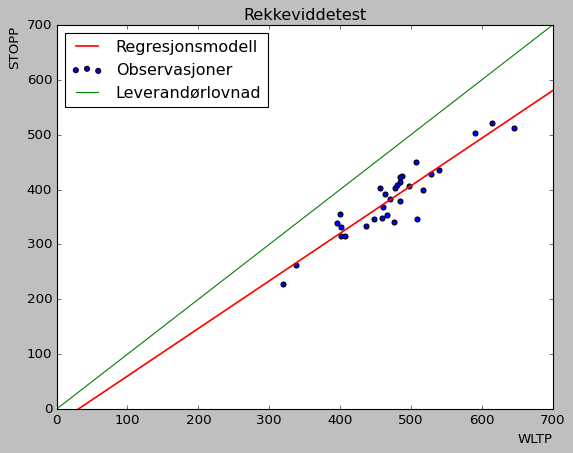

In [103]:
#Oppgave 3
np.linspace(0, 700, num=10)
            
#plot
plt.xlim([0, 700]) #x akse lim
plt.ylim([0, 700]) #y akse lim
sns.regplot(x='wltp_km', y='stopp_km', data=df, ci=None, truncate=False, scatter=False, color="red", label="Regresjonsmodell") #regresjonslinje
plt.scatter(df["wltp_km"], df["stopp_km"], label="Observasjoner") #observasjoner, scatter
plt.plot(np.linspace(0, 700, num=10), np.linspace(0, 700, num=10),color="green", label="Leverandørlovnad") #leverandørlovnad linje
plt.title('Rekkeviddetest') #tittel til plot
plt.xlabel('WLTP', loc="right") #x label tittel
plt.ylabel('STOPP', loc="top") #y label tittel
plt.legend(loc="upper left") #legende
plt.show() #viser plot
